In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 首先分析数据集
dataset_path='D:\PyProjects\DataSet\SharingBikes/day.csv' # 首先只分析day 数据
# 首先加载数据集
raw_df=pd.read_csv(dataset_path,index_col=0)
# print(raw_df.shape)  # (731, 15)
# print(raw_df.head()) # 查看是否正确加载
# print(raw_df.columns)
# 删除不需要的列，第1列，第12,13列
df=raw_df.drop(['dteday','casual','registered'],axis=1)
# print(df.shape) # (731, 12)
# print(df.head()) # 查看没有问题
print(df.info()) # 没有缺失值 第一列为object,需要进行转换
# print(df.columns)

# 分隔数据集
dataset=df.as_matrix() # 将pandas转为np.ndarray

# 将整个数据集分隔成train set和test set
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(dataset,test_size=0.1,random_state=37)
# print(train_set.shape) # (657, 12)
# print(test_set.shape) # (74, 12)
# print(dataset[:3])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 12 columns):
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: float64(4), int64(8)
memory usage: 74.2 KB
None


In [3]:
# 其次，构建随机森林回归器模型
from sklearn.ensemble import RandomForestRegressor 
rf_regressor=RandomForestRegressor()
# rf_regressor=RandomForestRegressor(n_estimators=1000,max_depth=10,min_samples_split=0.5)

rf_regressor.fit(train_set[:,:-1],train_set[:,-1]) # 训练模型

# 使用测试集来评价该回归模型
predict_test_y=rf_regressor.predict(test_set[:,:-1])

import sklearn.metrics as metrics
print('随机森林回归模型的评测结果----->>>')
print('均方误差MSE：{}'.format(
    round(metrics.mean_squared_error(predict_test_y,test_set[:,-1]),2)))
print('解释方差分：{}'.format(
    round(metrics.explained_variance_score(predict_test_y,test_set[:,-1]),2)))
print('R平方得分：{}'.format(
    round(metrics.r2_score(predict_test_y,test_set[:,-1]),2)))

随机森林回归模型的评测结果----->>>
均方误差MSE：291769.31
解释方差分：0.92
R平方得分：0.92


In [4]:
# 计算不同特征的相对重要性
def plot_importances(feature_importances, title, feature_names):
    '''将feature_importance绘制到图表中，便于观察，
    并把重要性大于5的特征打印出来'''
    # 将重要性都归一化为0-100之内
    feature_importances=100.0*(feature_importances/max(feature_importances))

    # 将得分从高到低排序
    index_sorted=np.flipud(np.argsort(feature_importances))
    # 让X坐标轴上的标签居中显示
    pos=np.arange(index_sorted.shape[0])+0.5
    
    # 画条形图
    plt.figure()
    plt.bar(pos,feature_importances[index_sorted],align='center')
    plt.xticks(pos,feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    
    # 把重要性结果打印出来
    print('{} importance list------>>>>>'.format(title))
    for importance,name in zip(feature_importances[index_sorted],
                               feature_names[index_sorted]):
        if importance>5:
            print('feature:{}, importance: {:.2f}'.format(name,importance))

RF regressor importance list------>>>>>
feature:temp, importance: 100.00
feature:yr, importance: 68.65
feature:hum, importance: 19.10
feature:season, importance: 16.66
feature:atemp, importance: 10.53
feature:windspeed, importance: 10.19
feature:mnth, importance: 6.61


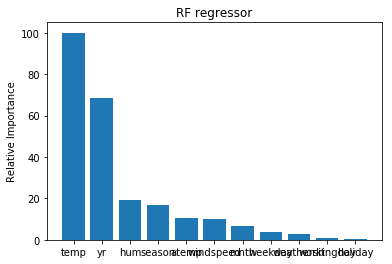

In [5]:
# print(np.array(df.columns[:-1]))
plot_importances(rf_regressor.feature_importances_,
                 'RF regressor',np.array(df.columns[:-1]))